In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Loading generation dataset
solar_generation_df = pd.read_csv('Plant_2_Generation_Data.csv')

In [ ]:
# Loading weather dataset
solar_weather_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [ ]:
# Displaying a small sample of the generation dataset
solar_generation_df.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER    AC_POWER  \
58690  2020-06-13 17:30:00   4136001  V94E5Ben1TlhnDV  203.486667  199.446667   
46906  2020-06-08 03:30:00   4136001  xMbIugepa2P7lBB    0.000000    0.000000   
23725  2020-05-27 19:15:00   4136001  rrq4fwE8jgrTyWY    0.000000    0.000000   
31930  2020-06-01 01:00:00   4136001  IQ2d7wF4YD8zU1Q    0.000000    0.000000   
63084  2020-06-15 19:30:00   4136001  LlT2YUhhzqhg5Sw    0.000000    0.000000   

       DAILY_YIELD   TOTAL_YIELD  
58690       3502.8  1.412277e+09  
46906       7775.0  1.068387e+08  
23725       5696.0  1.210361e+08  
31930          0.0  2.007802e+07  
63084       6151.0  2.827795e+08

In [ ]:
# Displaying a small sample of the weather dataset
solar_weather_df.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
1401  2020-05-29 14:45:00   4136001  iq8k7ZNt4Mwm3w0            35.610545   
2163  2020-06-06 14:00:00   4136001  iq8k7ZNt4Mwm3w0            33.672831   
2310  2020-06-08 02:45:00   4136001  iq8k7ZNt4Mwm3w0            24.488493   
2297  2020-06-07 23:30:00   4136001  iq8k7ZNt4Mwm3w0            25.253462   
1764  2020-06-02 10:00:00   4136001  iq8k7ZNt4Mwm3w0            27.998813   

      MODULE_TEMPERATURE  IRRADIATION  
1401           48.469777     0.519047  
2163           50.962035     0.732432  
2310           23.685627     0.000000  
2297           23.747111     0.000000  
1764           38.142512     0.469155

In [ ]:
# Convert DATE_TIME columns to datetime dtype in both datasets
for df in (solar_generation_df, solar_weather_df):
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Merge generation and weather data
merge_df = pd.merge(
    solar_generation_df.drop(columns=['PLANT_ID']),
    solar_weather_df.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)
merge_df.sample(5)

DATE_TIME       SOURCE_KEY    DC_POWER    AC_POWER  \
20013 2020-05-25 15:45:00  WcxssY2VbP4hApt  738.806667  723.386667   
48697 2020-06-09 00:00:00  Mx2yZCDsyf6DPfv    0.000000    0.000000   
40560 2020-06-05 03:30:00  Qf4GUc1pJu5T6c6    0.000000    0.000000   
33683 2020-06-01 21:00:00  vOuJvMaM2sgwLmb    0.000000    0.000000   
29289 2020-05-30 19:00:00  Et9kgGMDl729KT4    0.000000    0.000000   

       DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
20013       8393.0  181783596.0            37.532656           50.829609   
48697       9179.0    2642109.0            25.089851           23.415273   
40560       6904.0  838574623.0            23.204862           22.075747   
33683       4266.0    2337474.0            23.332743           23.007589   
29289       5509.0    1788809.0            32.823653           31.564240   

       IRRADIATION  
20013      0.49498  
48697      0.00000  
40560      0.00000  
33683      0.00000  
29289      0.00000

In [ ]:
# Extract date/time related features and compute minutes-since-midnight
merge_df['DATE_TIME'] = pd.to_datetime(merge_df['DATE_TIME'])

merge_df['DATE']  = merge_df['DATE_TIME'].dt.date
merge_df['TIME']  = merge_df['DATE_TIME'].dt.time
merge_df['DAY']   = merge_df['DATE_TIME'].dt.day
merge_df['MONTH'] = merge_df['DATE_TIME'].dt.month
merge_df['WEEK']  = merge_df['DATE_TIME'].dt.isocalendar().week

merge_df['TOTAL_MINUTES_PASS'] = (
    merge_df['DATE_TIME'].dt.hour * 60 +
    merge_df['DATE_TIME'].dt.minute
)

merge_df.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0       9425.0  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0  1.215279e+09   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK  TOTAL_MINUTES_PASS  
0   15      5    20                   0  
1   15      5    20                   0

In [ ]:
# Displaying the information of the mergerd dataset
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  WEEK                 67698 non-

In [ ]:
# checking for null values
merge_df.isnull().sum()

In [ ]:
# Discrbing the mergerd dataset
merge_df.describe()

DATE_TIME      DC_POWER      AC_POWER  \
count                          67698  67698.000000  67698.000000   
mean   2020-06-01 10:44:33.650625024    246.701961    241.277825   
min              2020-05-15 00:00:00      0.000000      0.000000   
25%              2020-05-23 21:00:00      0.000000      0.000000   
50%              2020-06-01 23:00:00      0.000000      0.000000   
75%              2020-06-09 23:30:00    446.591667    438.215000   
max              2020-06-17 23:45:00   1420.933333   1385.420000   
std                              NaN    370.569597    362.112118   

        DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
count  67698.000000  6.769800e+04         67698.000000        67698.000000   
mean    3294.890295  6.589448e+08            27.986756           32.607233   
min        0.000000  0.000000e+00            20.942385           20.265123   
25%      272.750000  1.996494e+07            24.570349           23.685627   
50%     2911.000000  2.826276e+08            26.910352           27.433723   
75%     5534.000000  1.348495e+09            30.912601           40.019036   
max     9873.000000  2.247916e+09            39.181638           66.635953   
std     2919.448386  7.296678e+08             4.021294           11.226446   

        IRRADIATION           DAY         MONTH       WEEK  TOTAL_MINUTES_PASS  
count  67698.000000  67698.000000  67698.000000    67698.0        67698.000000  
mean       0.229204     15.530680      5.529705  22.563296          714.329522  
min        0.000000      1.000000      5.000000       20.0            0.000000  
25%        0.000000      9.000000      5.000000       21.0          360.000000  
50%        0.018554     16.000000      6.000000       23.0          720.000000  
75%        0.431027     22.000000      6.000000       24.0         1080.000000  
max        1.098766     31.000000      6.000000       25.0         1425.000000  
std        0.309365      8.527546      0.499120    1.47473          415.672274

In [ ]:
#Encode the categorical columns 'SOURCE_KEY' and 'PLANT_ID' as numeric labels
from sklearn.preprocessing import LabelEncoder
merge_df['SOURCE_KEY_NUMBER'] = LabelEncoder().fit_transform(merge_df['SOURCE_KEY'])
merge_df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   
2            27.004764           25.060789          0.0  2020-05-15  00:00:00   
3            27.004764           25.060789          0.0  2020-05-15  00:00:00   
4            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK  TOTAL_MINUTES_PASS  SOURCE_KEY_NUMBER  
0   15      5    20                   0                  0  
1   15      5    20                   0                  1  
2   15      5    20                   0                  2  
3   15      5    20                   0                  3  
4   15      5    20                   0                  4

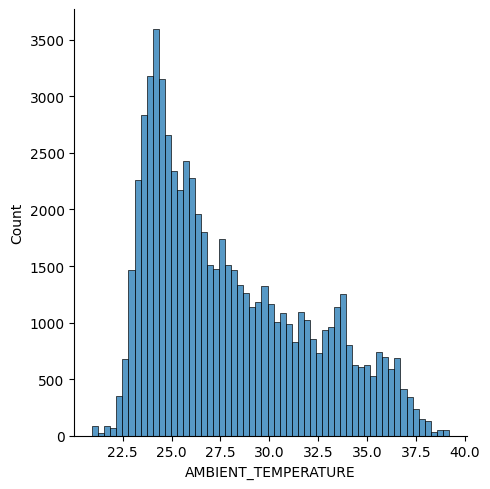

In [ ]:
#Plotting distribution of daily yield
sns.displot(data=merge_df, x="AMBIENT_TEMPERATURE")

In [ ]:
# Counting how many distinct calendar days (unique dates) are present in the dataframe
merge_df['DATE_TIME'].dt.date.nunique()

34

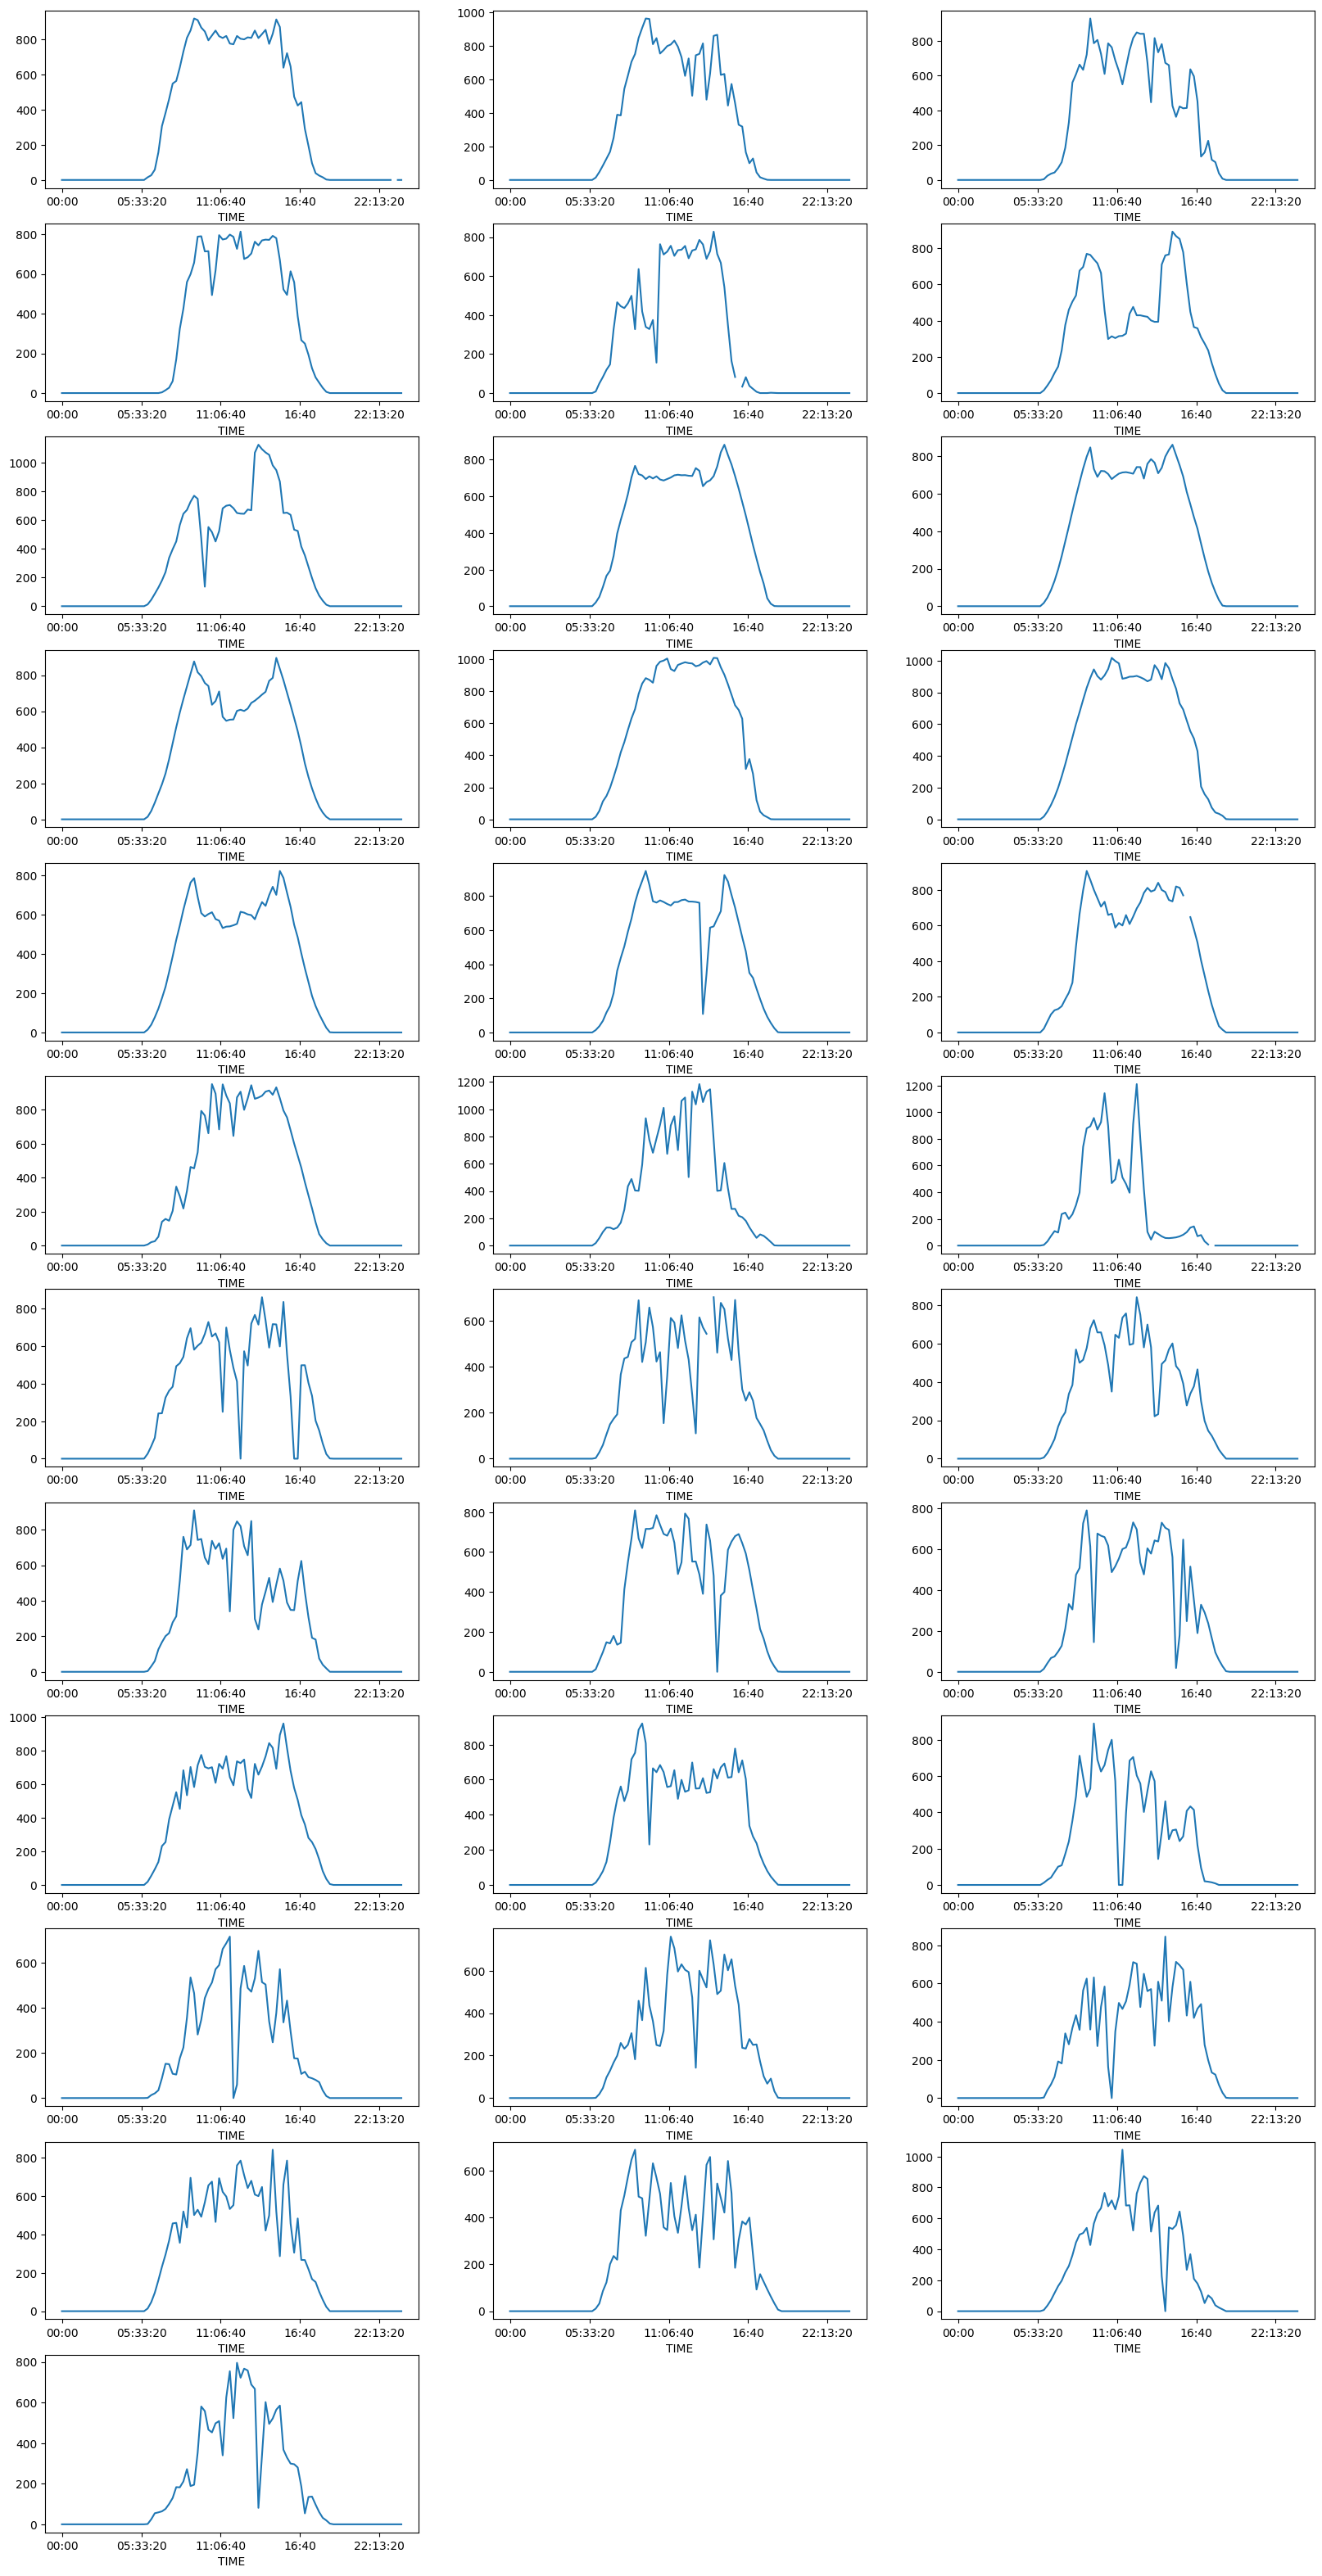

In [ ]:
# Creating pivot table for daywise plotting

solar_dc = merge_df.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data=None, row=None, col=None):
    cols = data.columns
    fig = plt.figure(figsize=(20, 40))
    for i in range(1, len(cols) + 1):
        ax = fig.add_subplot(row, col, i)
        data[cols[i - 1]].plot(ax=ax)
Daywise_plot(data=solar_dc, row=12, col=3)

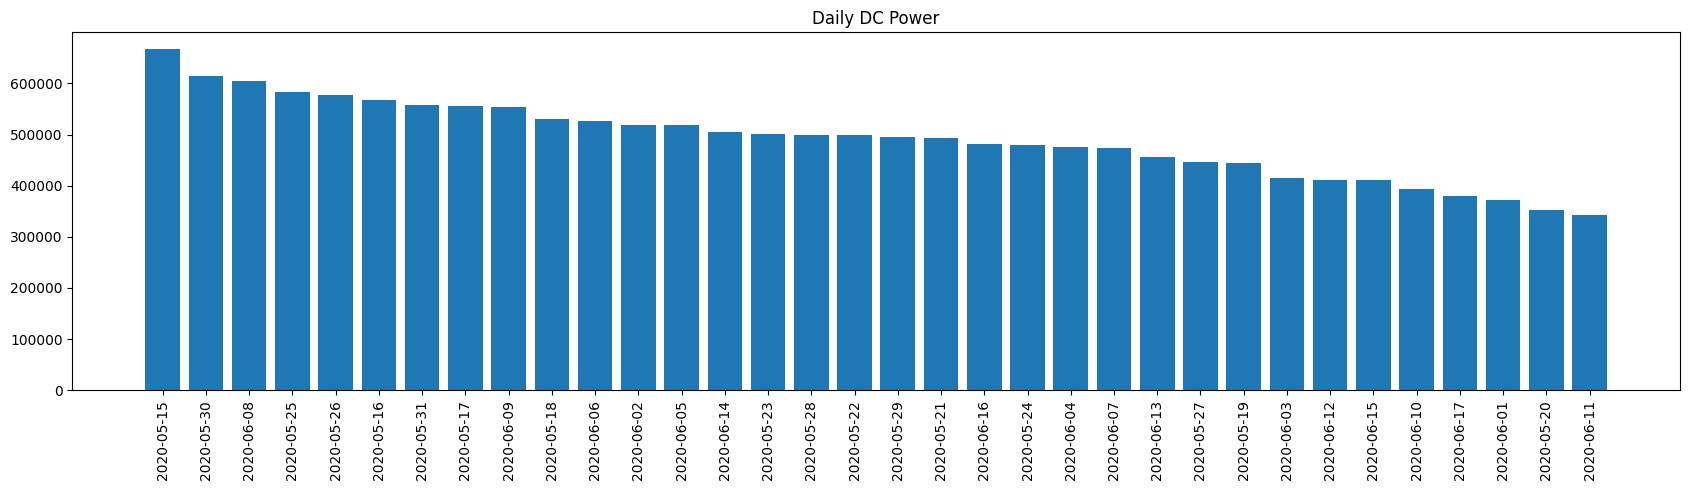

In [ ]:
# Aggregatting daily sums
daily_dc = merge_df['DC_POWER'].groupby(merge_df['DATE']).sum()
daily_dc = daily_dc.sort_values(ascending=False)

plt.figure(figsize=(17, 5))
plt.bar(daily_dc.index.astype(str), daily_dc.values)
plt.title('Daily DC Power')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

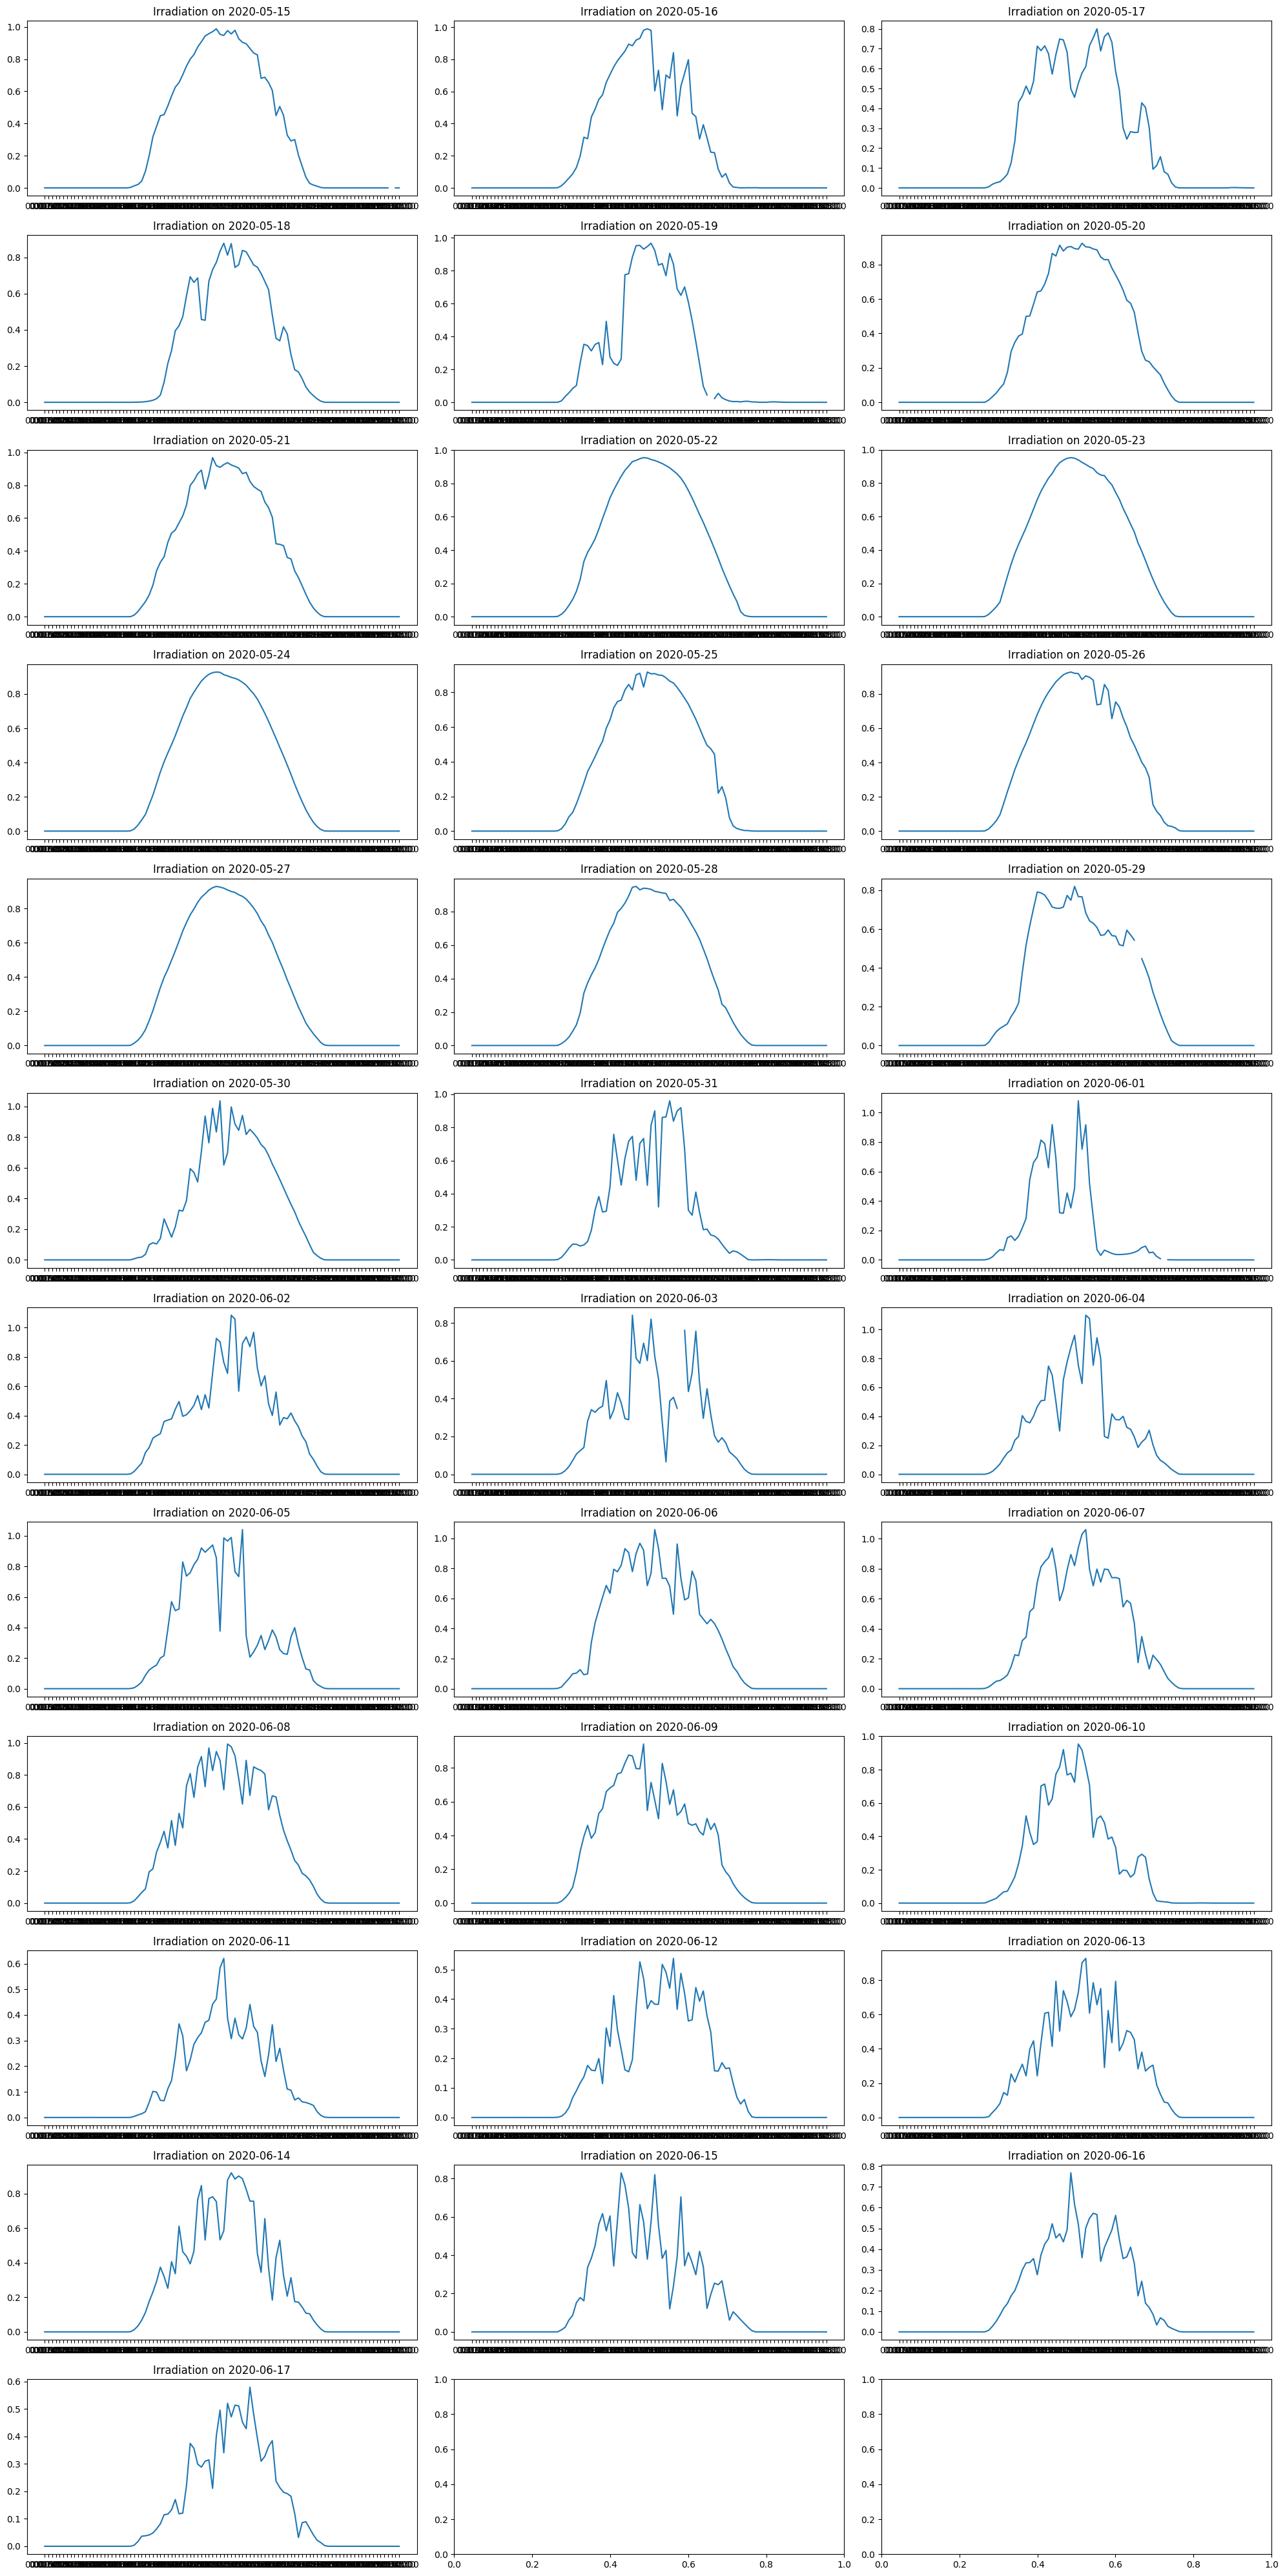

In [ ]:
# Create pivot table for irridation profile for each day
irradiation_data = merge_df.pivot_table(index='TIME', columns='DATE', values='IRRADIATION')
irradiation_data.index = irradiation_data.index.astype(str)

def draw_daywise_irradiation(data, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
    axes = axes.flatten()

    for i, column in enumerate(data.columns):
        axes[i].plot(data.index, data[column])
        axes[i].set_title(f'Irradiation on {column}')

    plt.tight_layout()

draw_daywise_irradiation(irradiation_data, n_rows=12, n_cols=3)

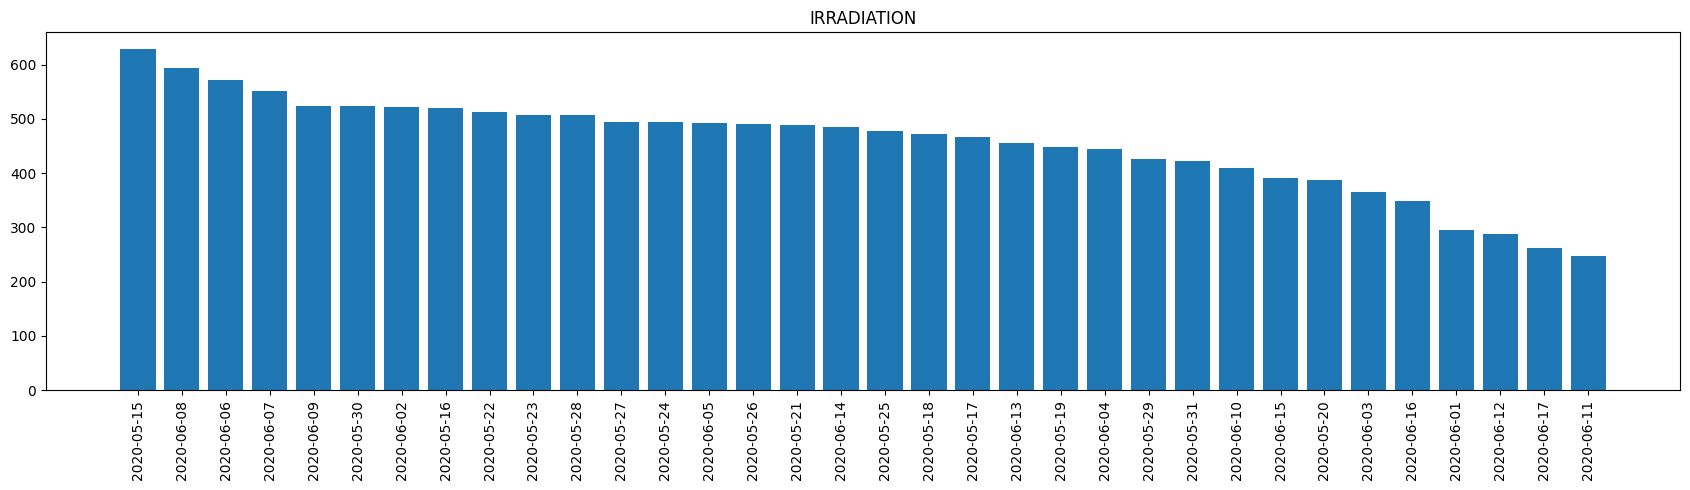

In [ ]:
# Sum and plot total daily irradiation
irradiation_sum = merge_df['IRRADIATION'].groupby(merge_df['DATE']).sum()
irradiation_sorted = irradiation_sum.sort_values(ascending=False)

plt.figure(figsize=(17, 5))
plt.bar(irradiation_sorted.index.astype(str), irradiation_sorted.values)
plt.title('IRRADIATION')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

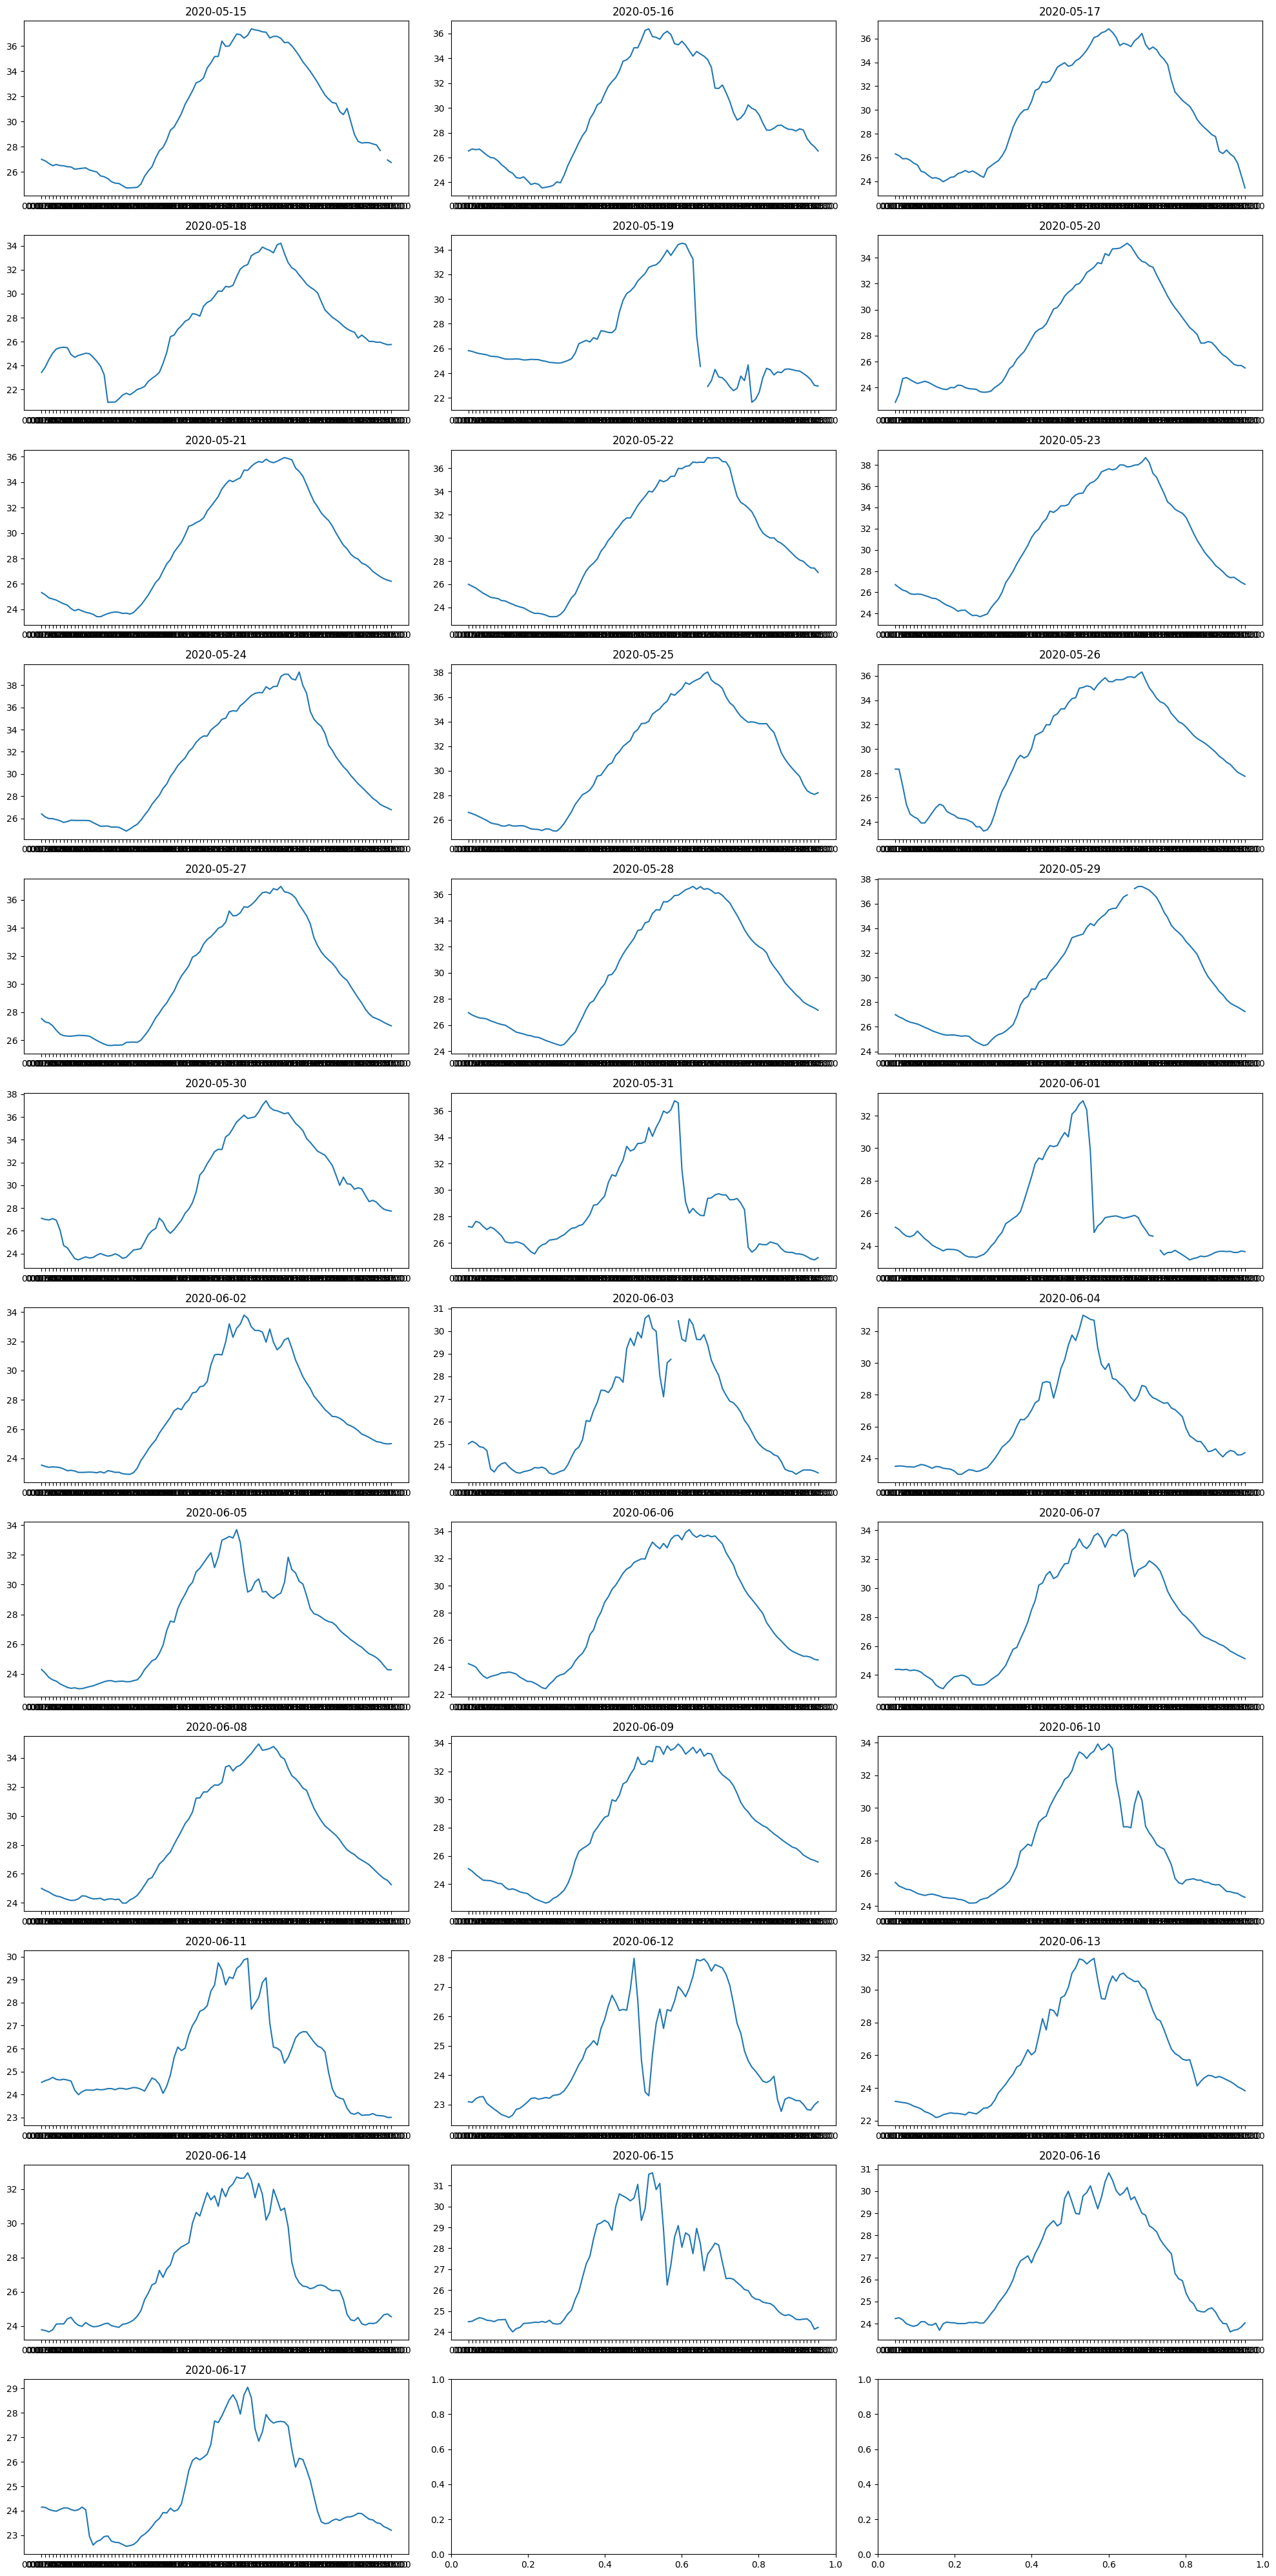

In [ ]:
# Create pivot table for ambient tempraturefor each day
data = merge_df.pivot_table(index='TIME', columns='DATE', values='AMBIENT_TEMPERATURE', aggfunc='mean')
data.index = data.index.astype(str)

fig, axs = plt.subplots(12, 3, figsize=(20, 40))
axs = axs.ravel()

for i, date in enumerate(data.columns):
    axs[i].plot(data.index, data[date])
    axs[i].set_title(str(date))

plt.tight_layout()
plt.show()



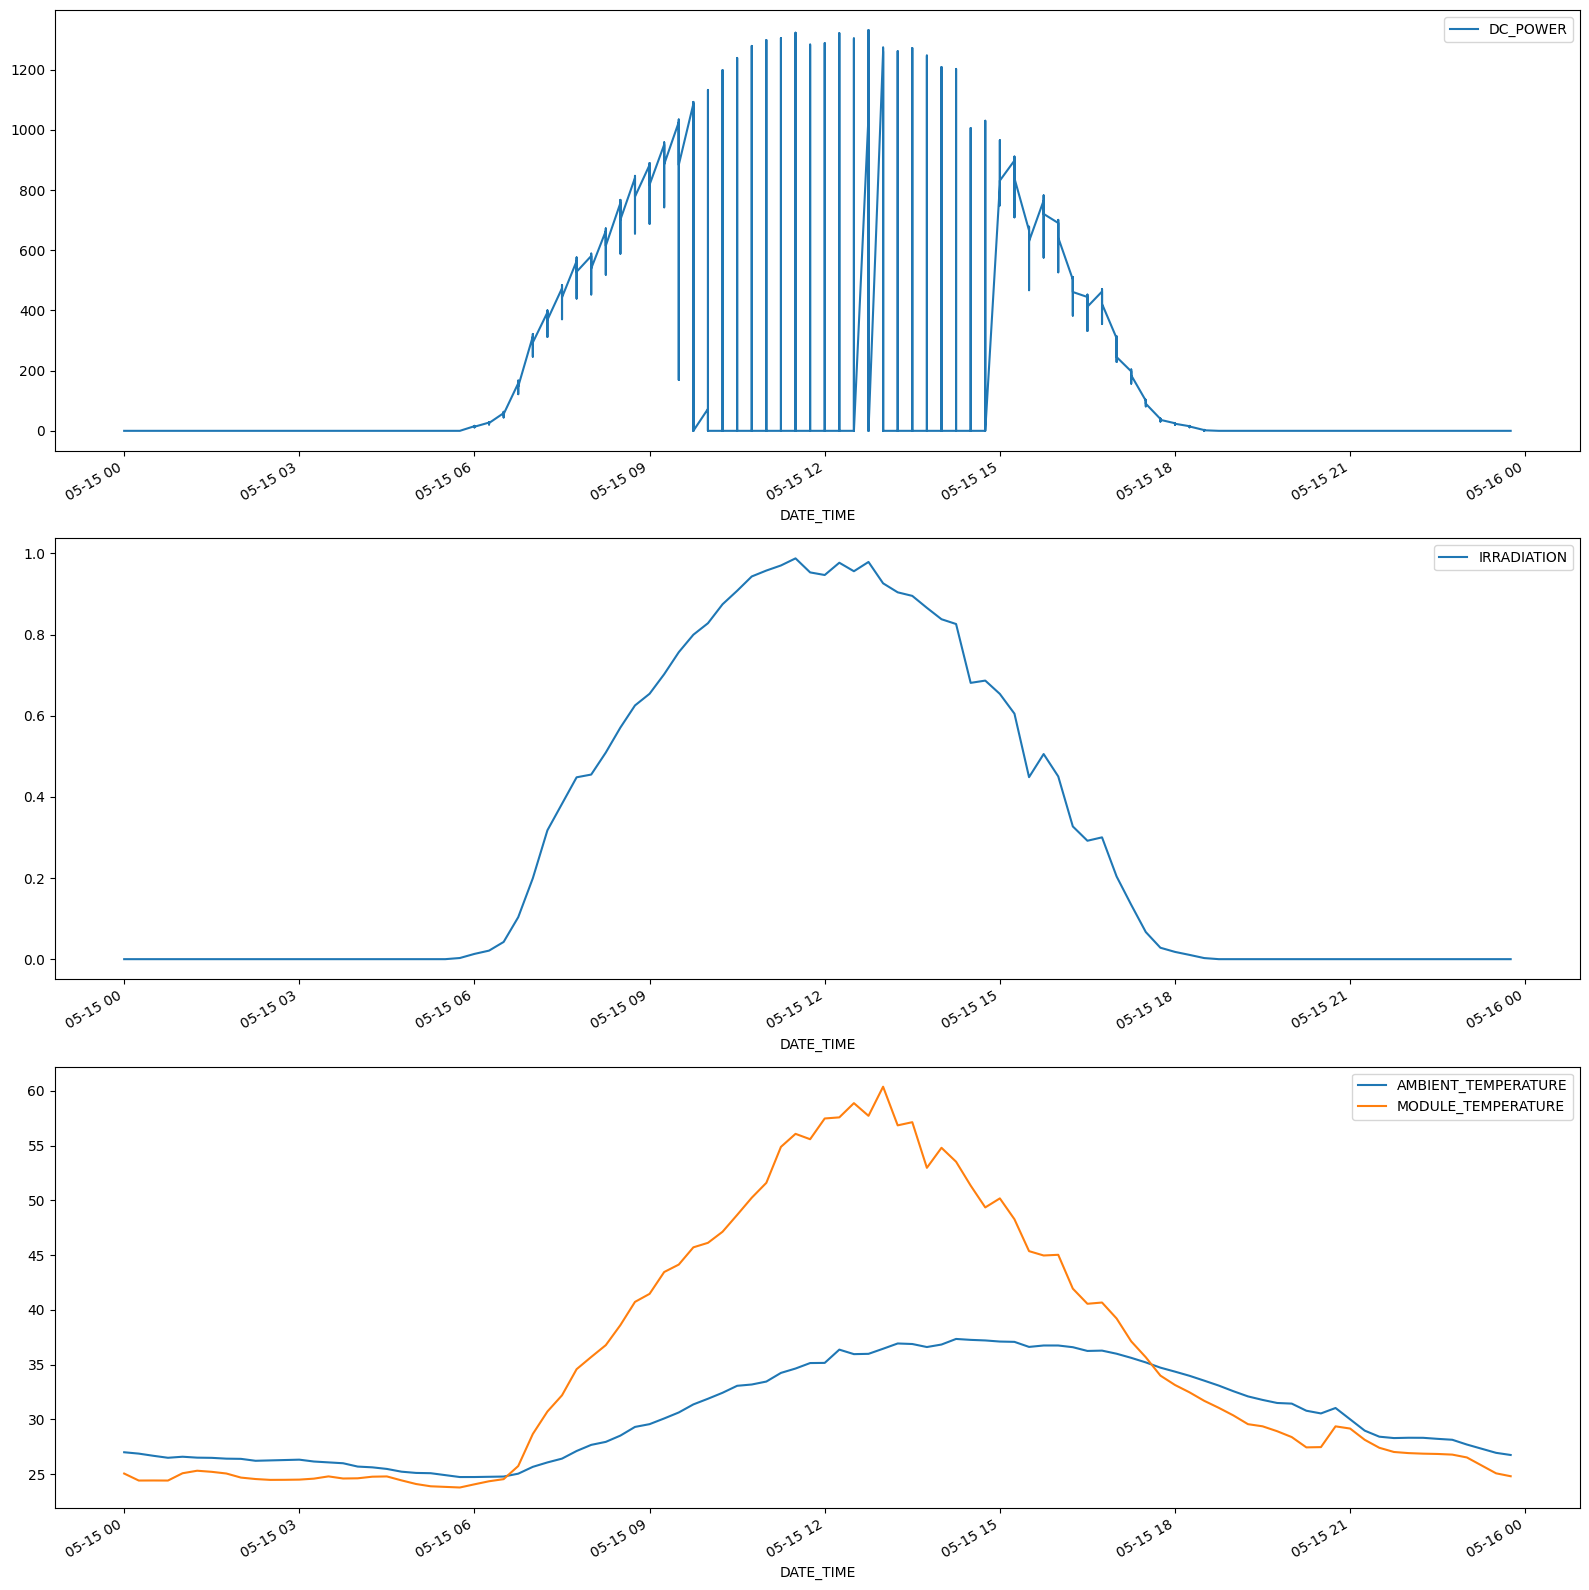

In [ ]:
# ploting DC power, irradiation, and temperatures over time
fig, axes = plt.subplots(3, 1, figsize=(16, 16))

d = merge_df[merge_df["DATE"] == pd.to_datetime("2020-05-15").date()]

d.plot(x="DATE_TIME", y="DC_POWER", ax=axes[0])
d.plot(x="DATE_TIME", y="IRRADIATION", ax=axes[1])
d[["DATE_TIME", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE"]].plot(x="DATE_TIME", ax=axes[2])

plt.tight_layout()
plt.show()

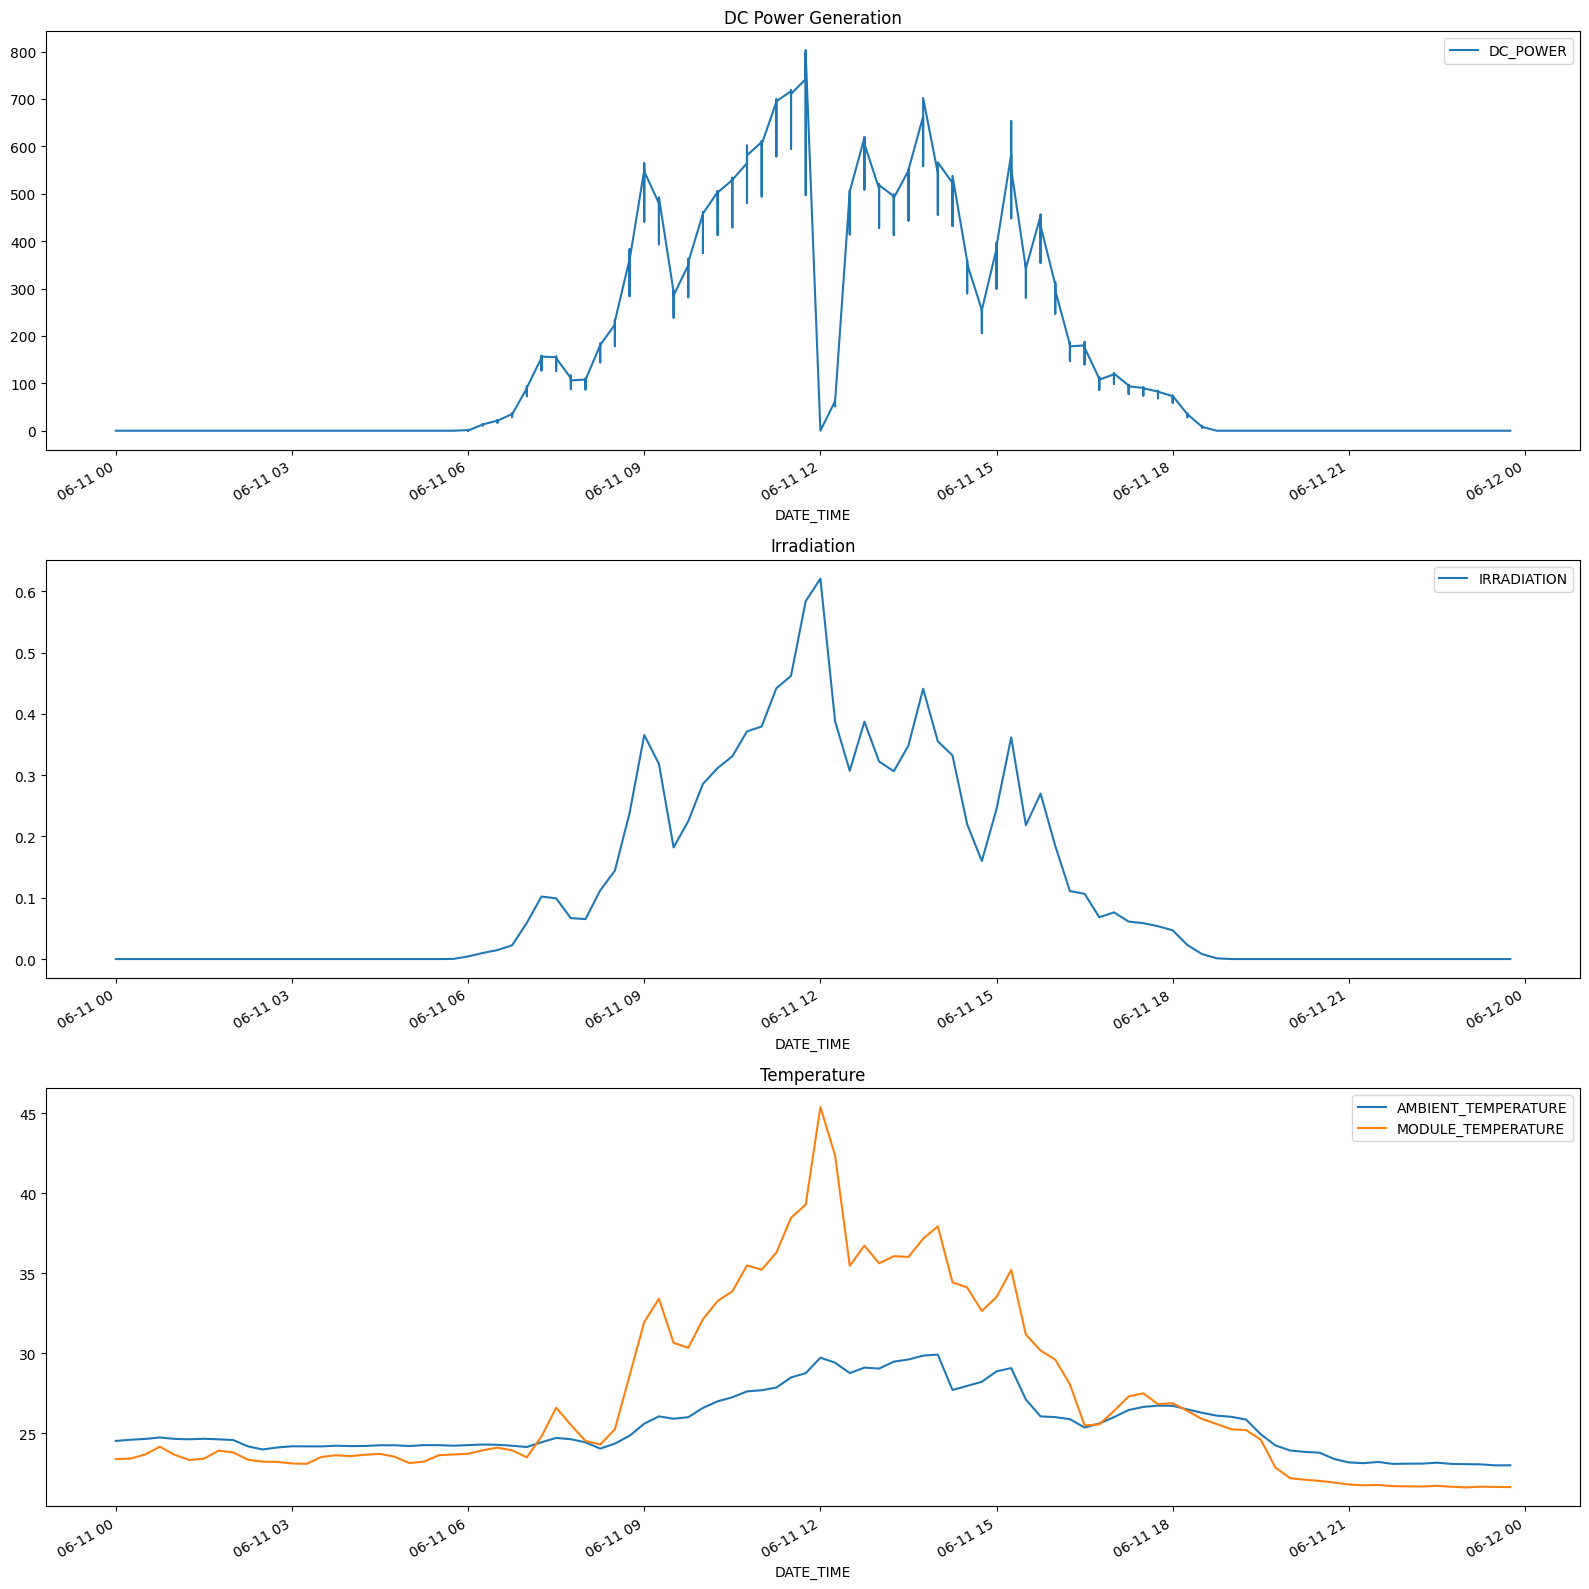

In [ ]:
# For another specific date, plotting DC power, irradiation, and temperatures over time
merge_df["DATE_STRING"] = merge_df["DATE"].astype(str)
d = merge_df[merge_df["DATE_STRING"] == "2020-06-11"]

fig, axs = plt.subplots(3, 1, figsize=(16, 16))

d.plot(x="DATE_TIME", y="DC_POWER", ax=axs[0])
axs[0].set_title("DC Power Generation")

d.plot(x="DATE_TIME", y="IRRADIATION", ax=axs[1])
axs[1].set_title("Irradiation")

d[["DATE_TIME", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE"]].plot(x="DATE_TIME", ax=axs[2])
axs[2].set_title("Temperature")

plt.tight_layout()
plt.show()


In [ ]:
# calculate average DC and AC power per day for days with nonzero power
solar_dc_power = merge_df.loc[merge_df.DC_POWER.gt(0), 'DC_POWER'].to_numpy()
solar_ac_power = merge_df.loc[merge_df.AC_POWER.gt(0), 'AC_POWER'].to_numpy()

In [ ]:
# Compute maximum conversion efficiency (AC/DC) in percent
eff = 100 * solar_ac_power.max() / solar_dc_power.max()
print("Power ratio AC/DC (Efficiency) of Solar Power Plant: {:.3f} %".format(eff))

Power ratio AC/DC (Efficiency) of Solar Power Plant: 97.501 %


In [ ]:
#extract all AC power values > 0 into a list
AC_list = merge_df[merge_df['AC_POWER'] > 0]['AC_POWER'].tolist()
len(AC_list)

32036

In [ ]:
#Extract all DC power values > 0 into a list
DC_list = merge_df[merge_df['DC_POWER'] > 0]['DC_POWER'].tolist()
DC_list.sort(reverse=True)
len(DC_list)

32036

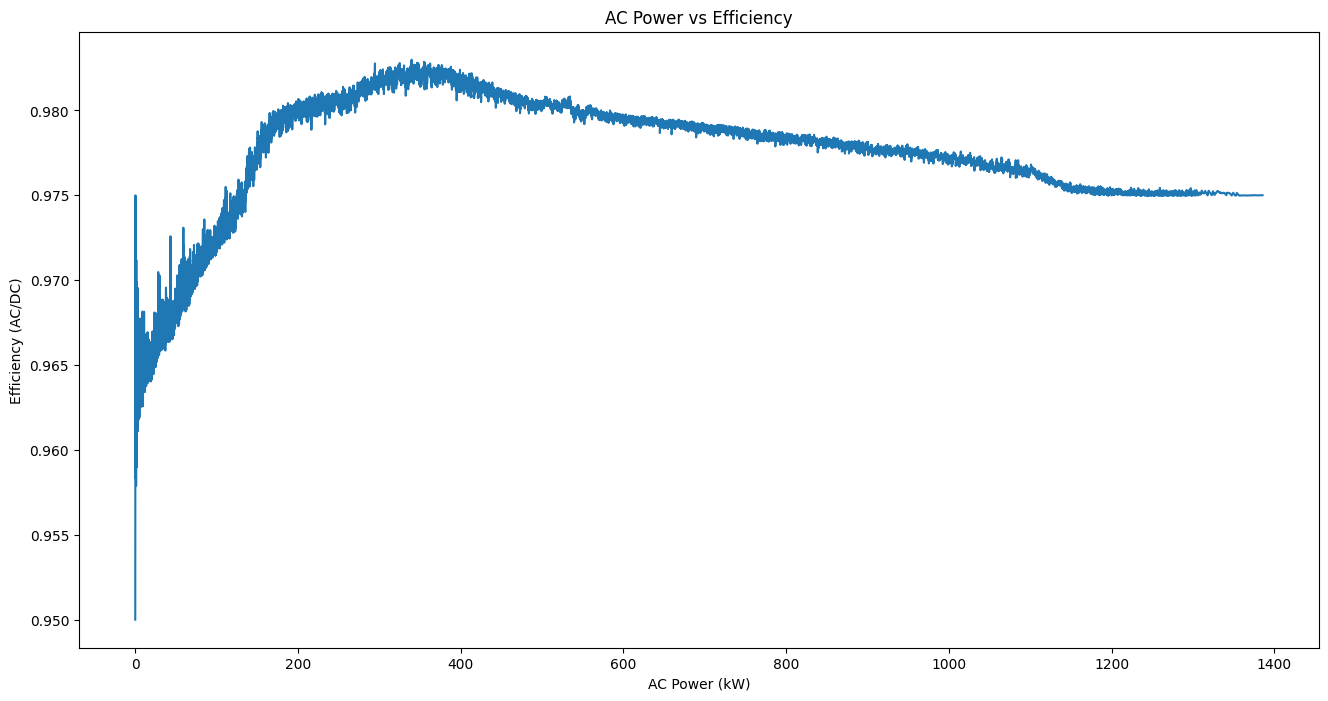

In [ ]:
# Calculate the inverter efficiency (AC/DC) for each record and plot its distribution
AC_list.sort()
DC_list.sort()

efficiency = [ac/dc for ac, dc in zip(AC_list, DC_list)]

plt.figure(figsize=(16, 8))
plt.plot(AC_list, efficiency)
plt.xlabel('AC Power (kW)')
plt.ylabel('Efficiency (AC/DC)')
plt.title('AC Power vs Efficiency')
plt.show()

In [ ]:
# Prepare feature matrix X and target y for machine learning
df2 = merge_df.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [ ]:
# Display first few rows of feature matrix X
X.head()

DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  9425.000000  2.429011e+06            27.004764           25.060789   
1     0.000000  1.215279e+09            27.004764           25.060789   
2  3075.333333  2.247720e+09            27.004764           25.060789   
3   269.933333  1.704250e+06            27.004764           25.060789   
4  3177.000000  1.994153e+07            27.004764           25.060789   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [ ]:
# Display first few values of tagert vector y
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [ ]:
# Splitting the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

split = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_test, y_train, y_test = split


In [ ]:
# Train and evaluate a Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test) * 100
print("LR Model score =", round(accuracy, 4), "%")

LR Model score = 99.9994 %


In [ ]:
# Re-evaluate Linear Regression model using R2 score metric

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = round(r2_score(y_test, pred) * 100, 2)

print("R2 Score:", score, "%")

R2 Score: 100.0 %


In [ ]:
# Train a Random Forest regressor and evaluate its R2 score on test data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
score = round(r2_score(y_test, pred) * 100, 2)

print("R2 Score:", score, "%")

R2 Score: 100.0 %


In [ ]:
# Train a Decision Tree regressor and evaluate its R2 score on test data
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
score = round(r2_score(y_test, pred) * 100, 2)

print("R2 Score:", score, "%")

R2 Score: 100.0 %


In [ ]:
# Predict AC power values using trained Random Forest
output = rf.predict(X_test)
print(output)

[   0.            0.          684.72364286 ...    0.         1007.17792857
    0.        ]


In [ ]:
# Create DataFrame to compare Actual vs Predicted values
result = pd.DataFrame()
result['Actual'] = y_test
result['Predicted'] = output
result.head()

Actual   Predicted
40426    0.000000    0.000000
50974    0.000000    0.000000
53919  684.913333  684.723643
2384     0.000000    0.000000
22014    0.000000    0.000000

In [ ]:
# Calculate error between Actual and Predicted
result['Error'] = result.Actual - result.Predicted
result.head()

Actual   Predicted    Error
40426    0.000000    0.000000  0.00000
50974    0.000000    0.000000  0.00000
53919  684.913333  684.723643  0.18969
2384     0.000000    0.000000  0.00000
22014    0.000000    0.000000  0.00000

In [ ]:
#Filter for predictions with error <= 20
filtered = result[result.Error <= 20]
filtered.sample(25)

Actual   Predicted     Error
38153    0.000000    0.000000  0.000000
48909    0.000000    0.000000  0.000000
240      0.000000    0.000000  0.000000
11556    0.000000    0.000000  0.000000
2214     0.000000    0.000000  0.000000
34766  552.306667  552.878286 -0.571619
30981  906.846667  908.176405 -1.329738
15187    0.000000    0.000000  0.000000
61139    0.000000    0.000000  0.000000
36313    0.000000    0.000000  0.000000
38513    0.000000    0.000000  0.000000
6795     0.000000    0.000000  0.000000
23620   95.173333   95.183719 -0.010386
11950    0.000000    0.000000  0.000000
41398  939.220000  940.025176 -0.805176
16677  182.953333  182.905238  0.048095
49416  529.220000  529.081048  0.138952
27746    0.000000    0.000000  0.000000
62470  820.846667  821.475057 -0.628390
27782    0.000000    0.000000  0.000000
22380    0.000000    0.000000  0.000000
38190    0.000000    0.000000  0.000000
63516    0.000000    0.000000  0.000000
16644  339.964286  339.928033  0.036252
14867  611.206667  611.082700  0.123967

In [ ]:
#Reloading the generation and weather data, merge them on DATE_TIME
gen = pd.read_csv('Plant_2_Generation_Data.csv')
weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'])
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'])

df = pd.merge(gen.drop('PLANT_ID', axis=1), weather.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1), on='DATE_TIME')
df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0

<Axes: xlabel='DATE_TIME'>

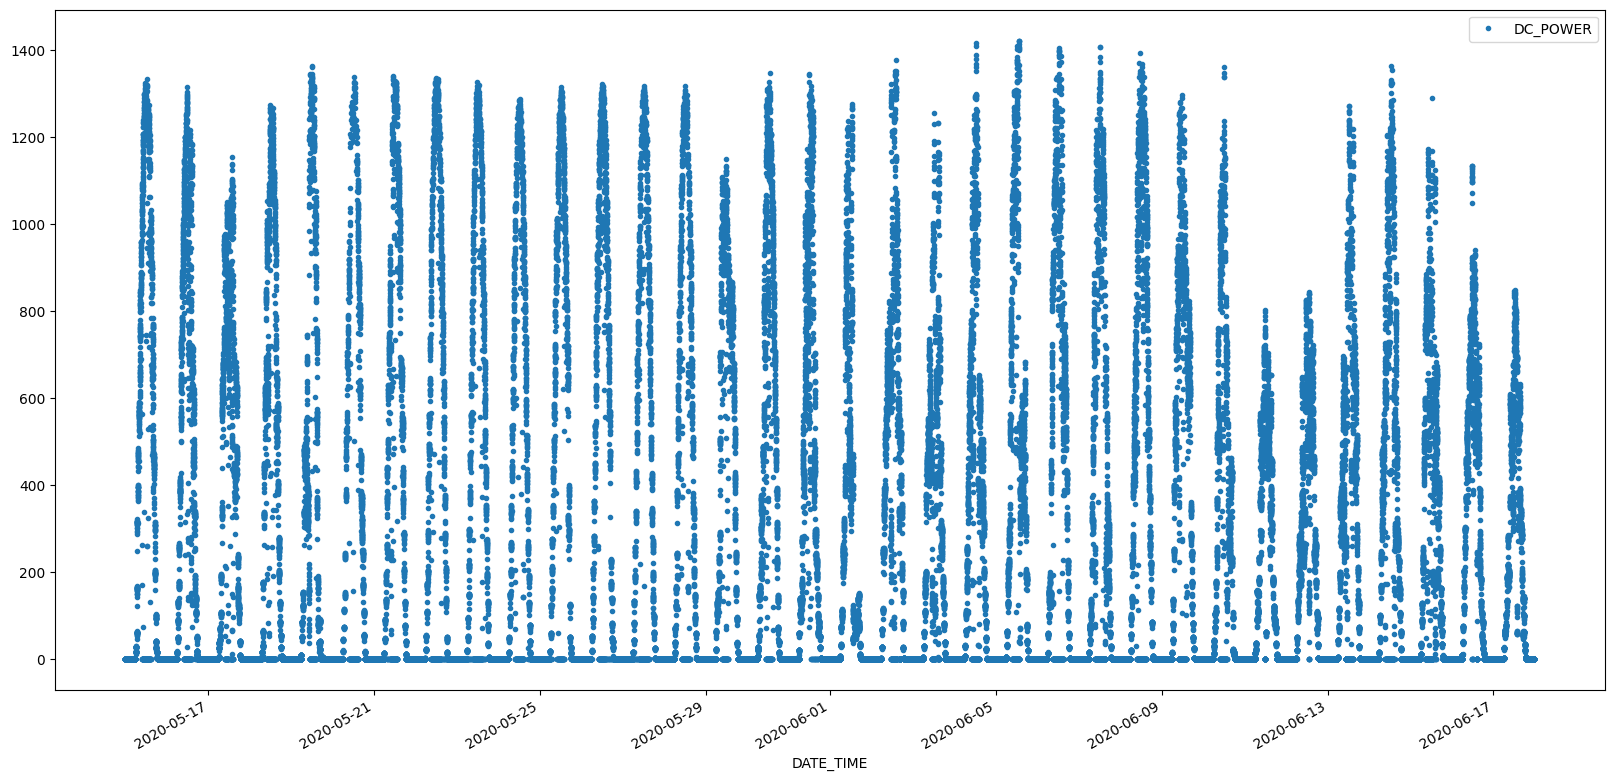

In [ ]:
# Plot DC_POWER over time
df.plot(x= 'DATE_TIME', y='DC_POWER', style='.', figsize = (20, 10))

<Axes: xlabel='DATE_TIME'>

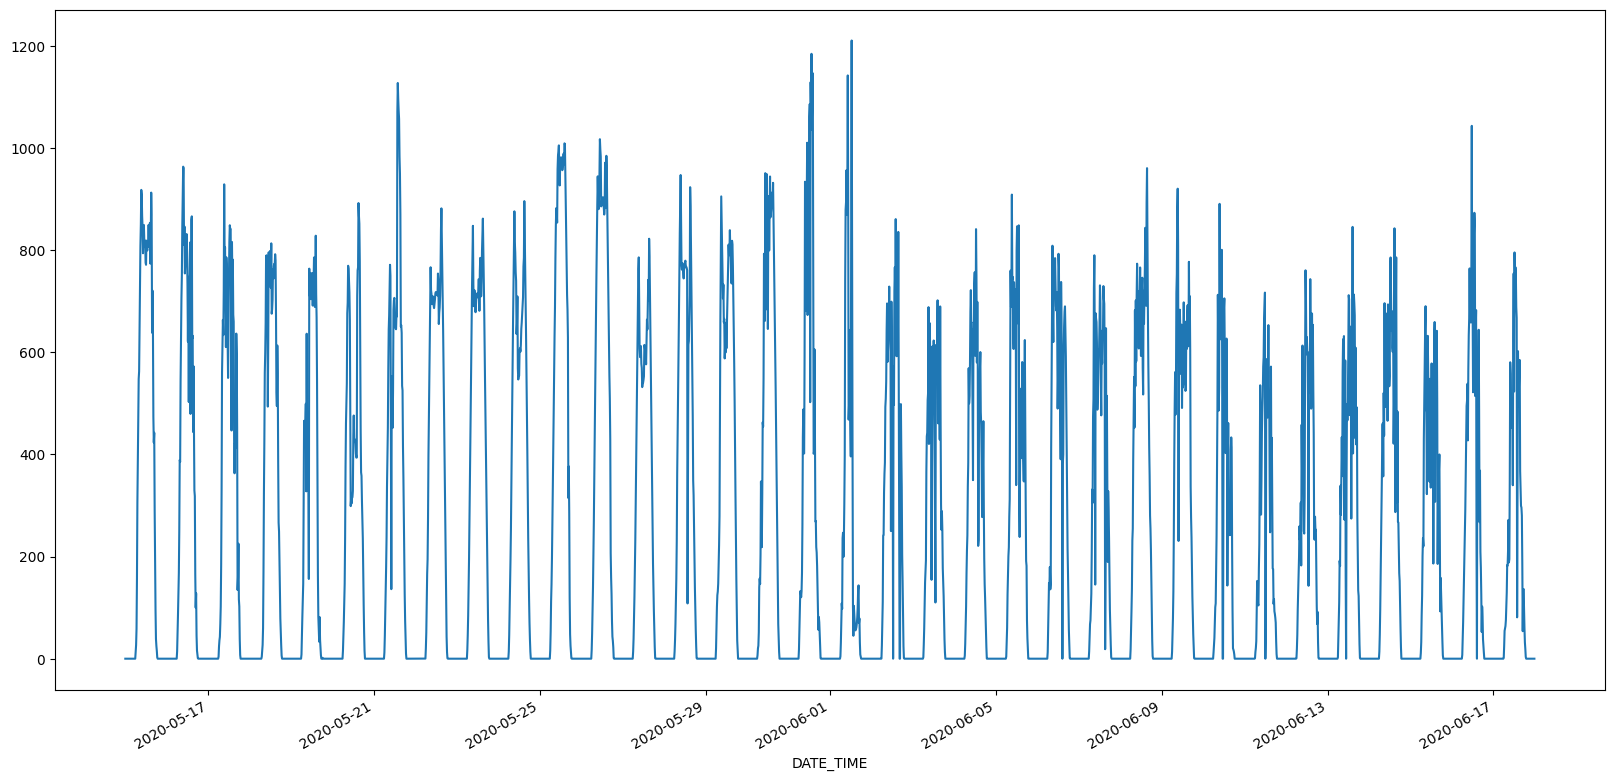

In [ ]:
#Compute and plot mean DC power per timestamp
dc_avg = df.groupby('DATE_TIME')['DC_POWER'].mean()
dc_avg.plot(figsize = (20, 10))

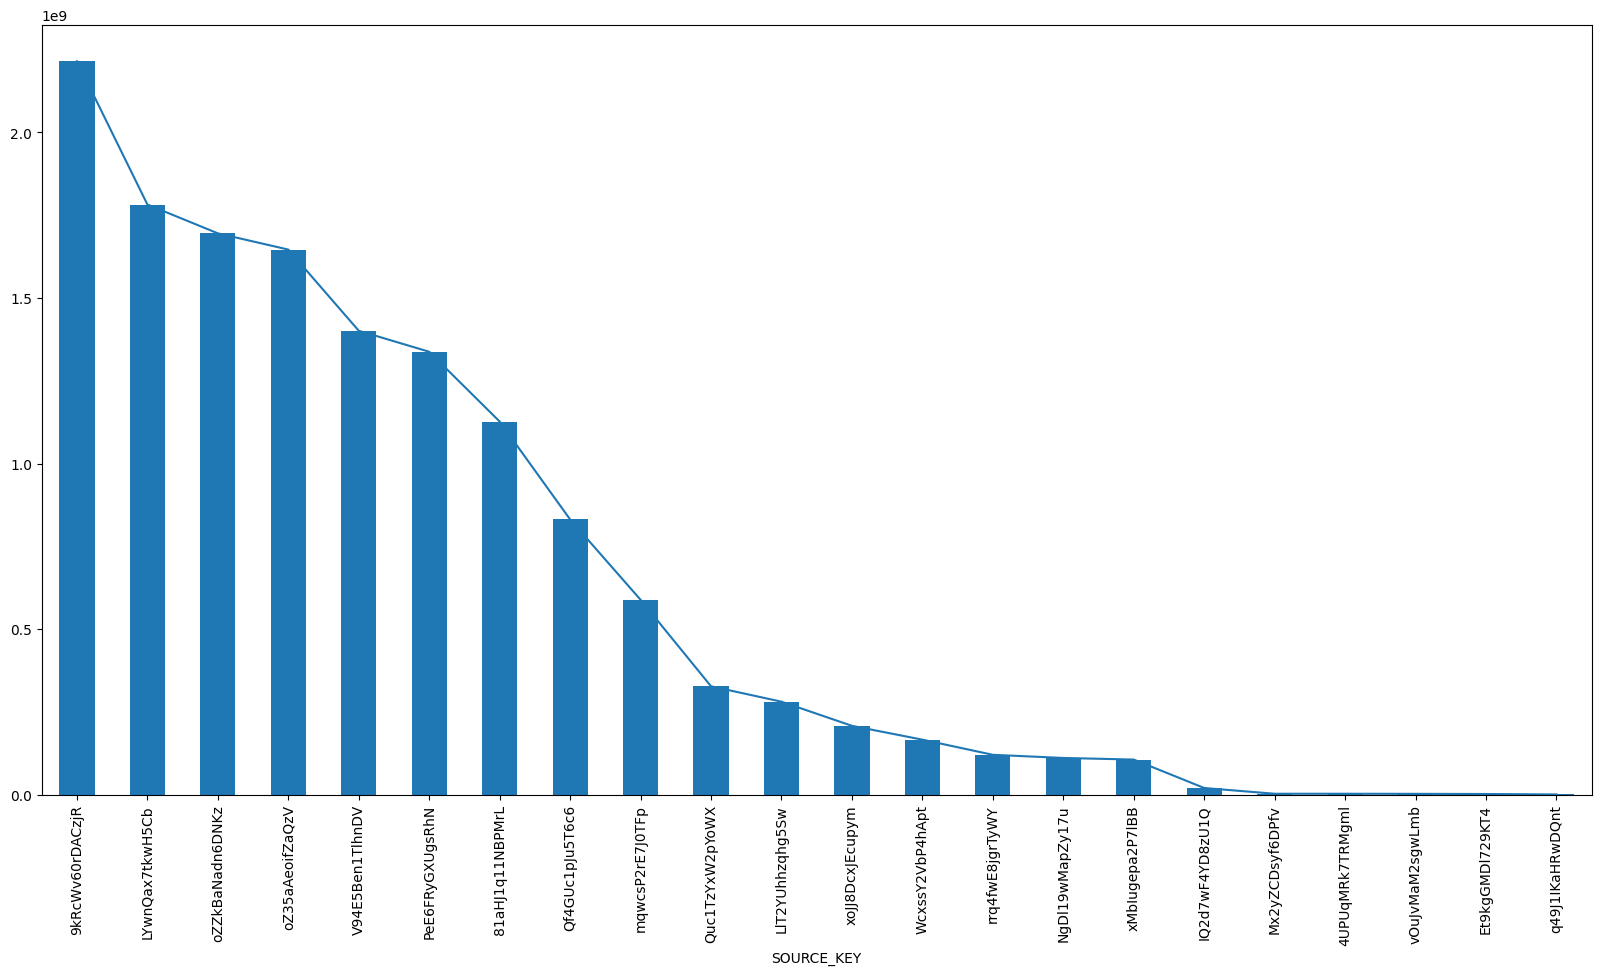

In [ ]:
# Plot average total yield per source key
mean_yield = df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False)

mean_yield.plot(kind='line', figsize = (20, 10))
mean_yield.plot(kind='bar', figsize = (20, 10))
plt.show()

In [ ]:
# Count occurrences of each source key
df['SOURCE_KEY'].value_counts()

SOURCE_KEY
81aHJ1q11NBPMrL    3259
9kRcWv60rDACzjR    3259
LYwnQax7tkwH5Cb    3259
V94E5Ben1TlhnDV    3259
PeE6FRyGXUgsRhN    3259
LlT2YUhhzqhg5Sw    3259
xoJJ8DcxJEcupym    3259
vOuJvMaM2sgwLmb    3259
oZZkBaNadn6DNKz    3259
WcxssY2VbP4hApt    3259
rrq4fwE8jgrTyWY    3259
q49J1IKaHRwDQnt    3259
4UPUqMRk7TRMgml    3195
Et9kgGMDl729KT4    3195
oZ35aAeoifZaQzV    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Quc1TzYxW2pYoWX    3195
IQ2d7wF4YD8zU1Q    2355
NgDl19wMapZy17u    2355
mqwcsP2rE7J0TFp    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

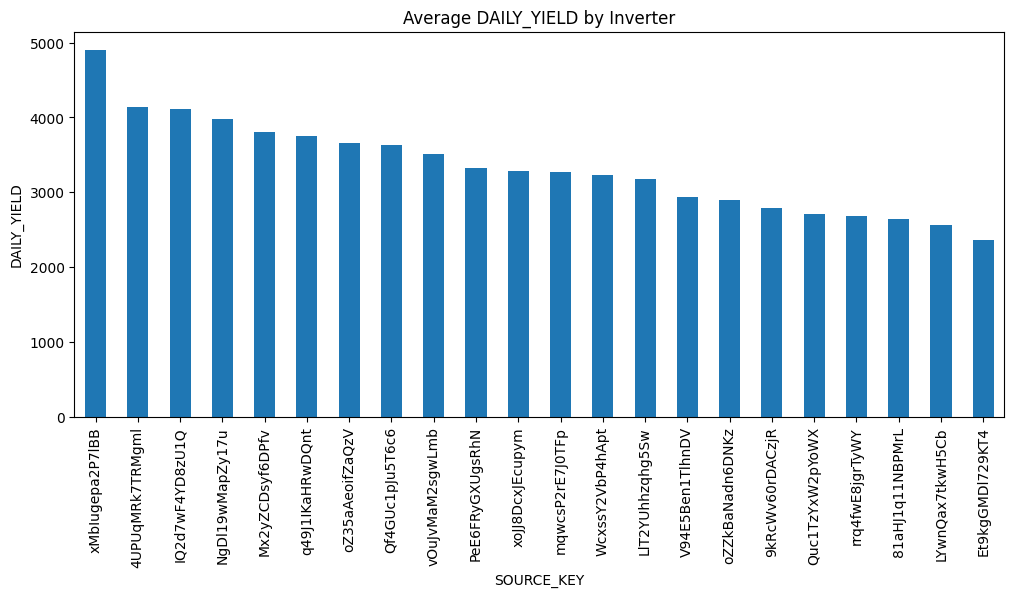

In [ ]:
# Plot the average daily yield for each source key
daily_yield_avg = df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
plt.title('Average DAILY_YIELD by Inverter')
plt.ylabel('DAILY_YIELD')
daily_yield_avg.plot(kind='bar')
plt.show()


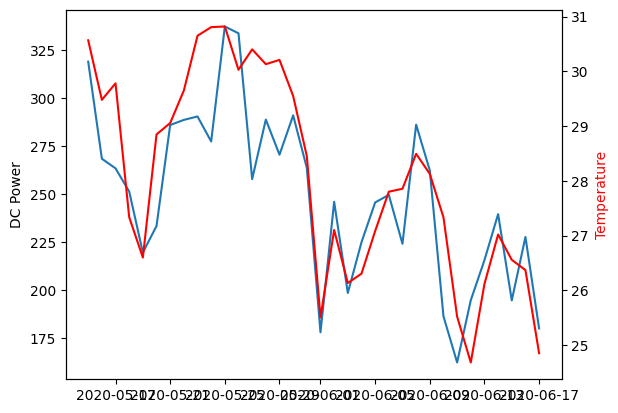

In [ ]:
# Plotting the daily average DC power and ambient temperature on dual axes
df1 = df.set_index('DATE_TIME')
daily = df1.drop('SOURCE_KEY', axis=1).resample('D').mean()

fig, ax1 = plt.subplots()

ax1.plot(daily.index, daily['DC_POWER'])
ax1.set_ylabel('DC Power')

ax2 = ax1.twinx()
ax2.plot(daily.index, daily['AMBIENT_TEMPERATURE'], color='red')
ax2.set_ylabel('Temperature', color='red')

plt.show()

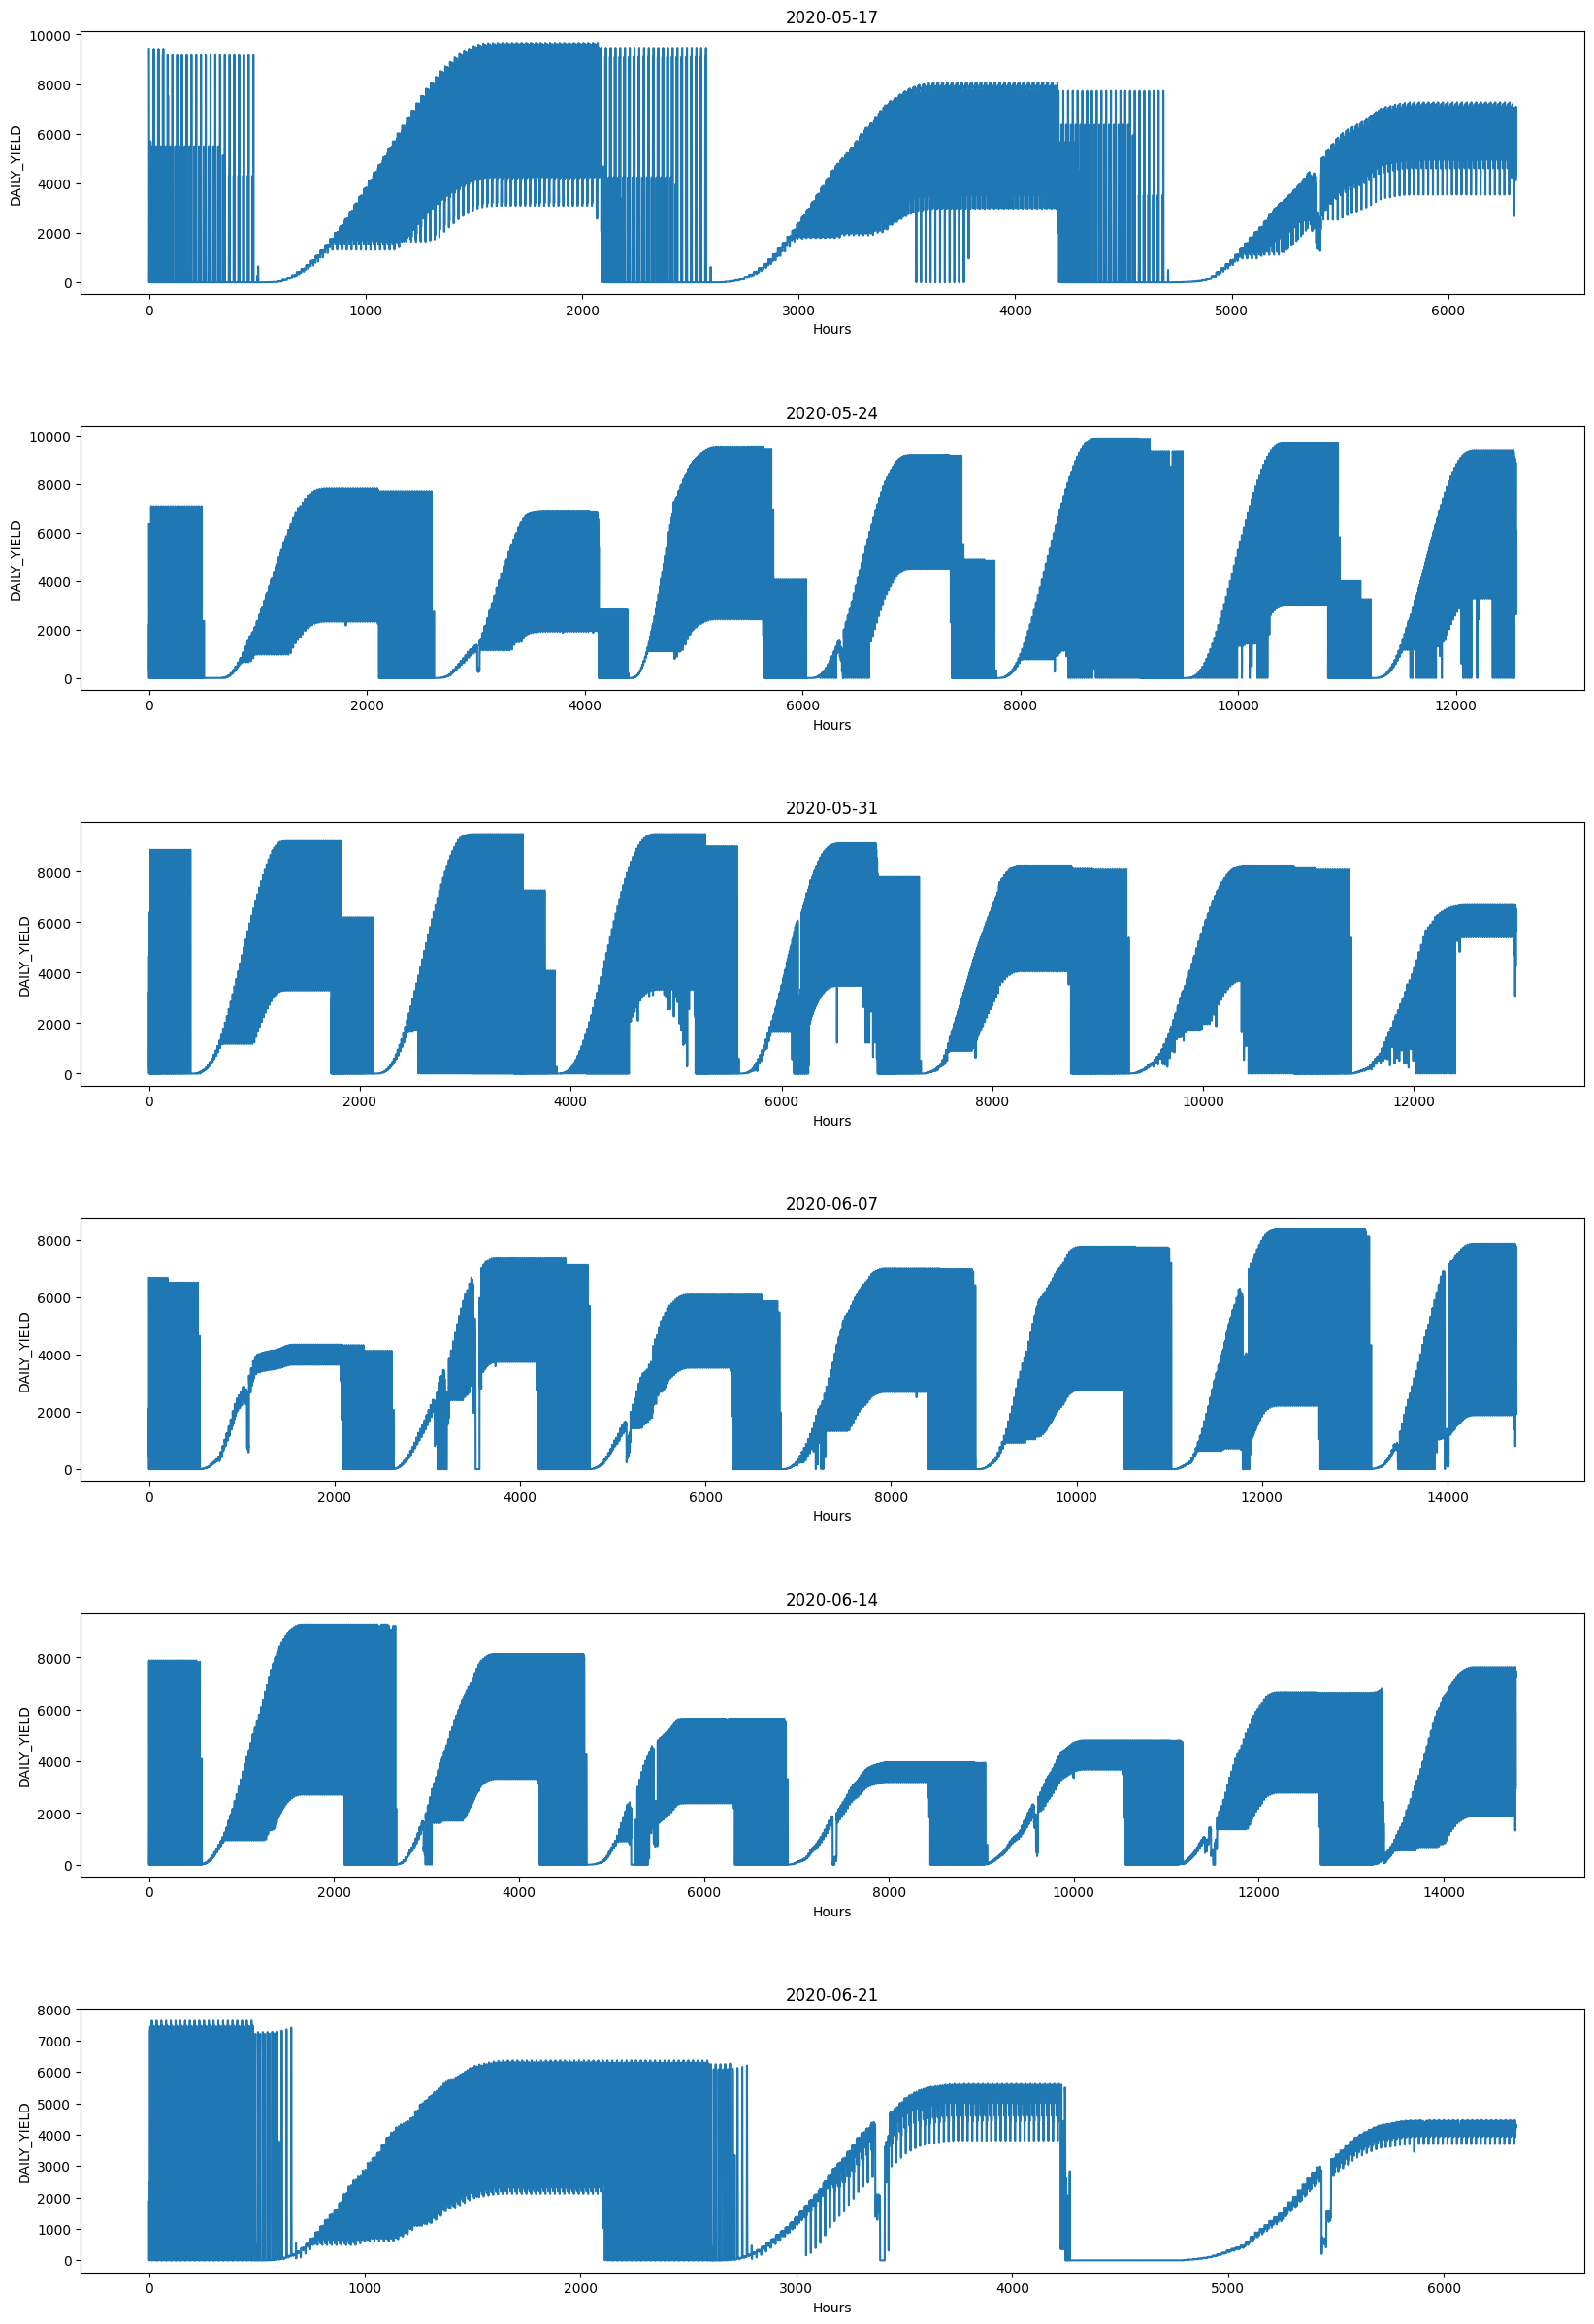

In [ ]:
# Plot weekly patterns of daily yield for each week of data
groups = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='W'))
fig, axs = plt.subplots(len(groups), 1, figsize=(20, 30))

for ax, (name, group) in zip(axs, groups):
    ax.plot(group.values)
    ax.set_xlabel('Hours')
    ax.set_ylabel('DAILY_YIELD')
    ax.set_title(str(name.date()))

plt.subplots_adjust(hspace=0.5)
plt.show()


/tmp/ipython-input-3648082141.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df1['DAILY_YIELD'].resample('H').mean()


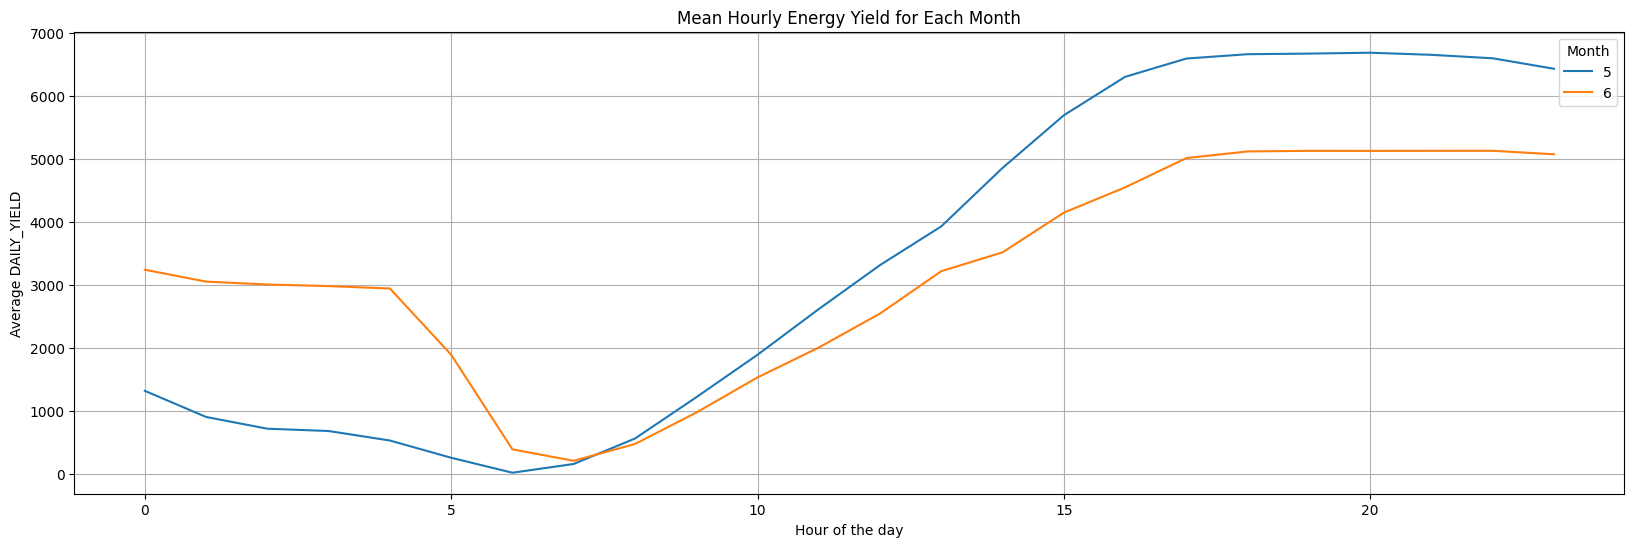

In [ ]:
# Compute and plot mean hourly energy yield profiles for each month
hourly_data = df1['DAILY_YIELD'].resample('H').mean()
monthly_hourly = pd.DataFrame(index=range(24))

for m in range(1, 13):
    month_data = hourly_data[hourly_data.index.month == m]
    hourly_profile = month_data.groupby(month_data.index.hour).mean()
    if not hourly_profile.empty and len(hourly_profile) == 24:
        monthly_hourly[m] = hourly_profile.values

plt.figure(figsize=(20, 6))
monthly_hourly.plot(ax=plt.gca())
plt.xlabel('Hour of the day')
plt.ylabel('Average DAILY_YIELD')
plt.title('Mean Hourly Energy Yield for Each Month')
plt.legend(title='Month')
plt.grid(True)
plt.show()